<a href="https://colab.research.google.com/github/martanascimento1/datascience1/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

É um algoritmo de classificação binária; Por exemplo, temos duas classes Classe 0 e Classe 1 se o valor da função logística para uma entrada for maior que 0,5 (valor limite), então ela pertence à Classe 1, caso contrário, pertence à Classe 0


In [3]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

In [4]:
X = X.loc[y.isin([0,1]), 'petal width (cm)'].values
y = y[y.isin([0,1])].values

Separar os dados em treino e teste:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

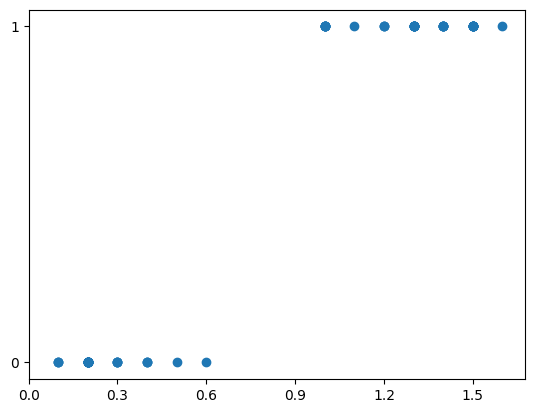

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)

ax.set(yticks=[0,1],xticks=[0, 0.3, 0.6, 0.9,1.2 ,1.5 ])

plt.show()

In [ ]:
#começando a aplicar a regressão logística

from sklearn.linear_model import LogisticRegression

In [ ]:
#Criando o classificador

clf = LogisticRegression(random_state=0).fit(X_train.reshape(-1, 1), y_train)

In [ ]:
#verificando o coeficiente angular:

w1 = clf.coef_ [0][0]


In [ ]:
#verificando o coeficiente linear:

w0 = clf.intercept_[0]

In [ ]:
from scipy.special import expit


In [ ]:
import numpy as np

valores_x = np.linspace(X_train.min(), X_train.max(), 100)
#valores_x

In [ ]:
#calculando o valor para cada valor de  y

valores_y = expit(w1*valores_x +w0)

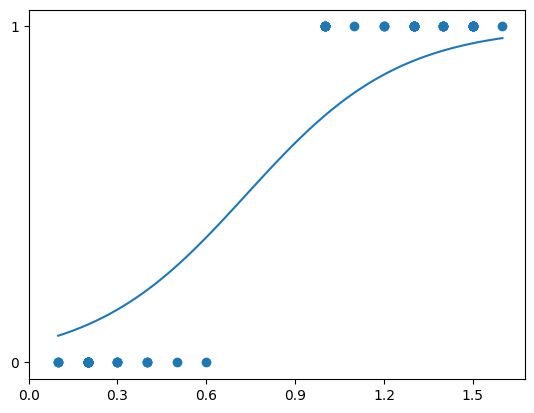

In [ ]:
#vizualizando graficamente:

fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)

ax.set(yticks=[0,1],xticks=[0, 0.3, 0.6, 0.9,1.2 ,1.5 ])
plt.show()

In [ ]:
y_curva = expit(w1*X_train+w0)

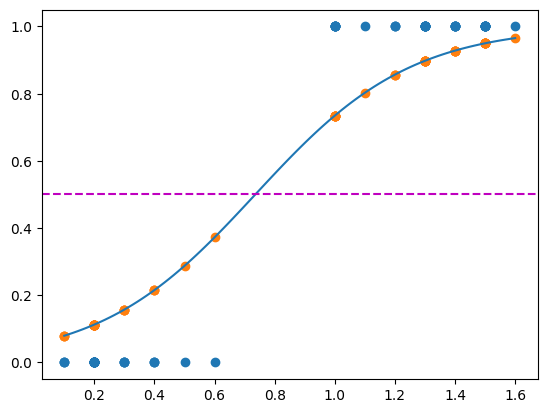

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X_train, y_train)
ax.plot(valores_x, valores_y)
ax.scatter(X_train, y_curva)

ax.axhline(y=0.5,c='m',linestyle='--')

plt.show()


In [ ]:
expit(w1*0.2+w0)

0.11281795739416337

In [ ]:
#previsão da probabilidade
clf.predict_proba(X_train.reshape(-1,1))[0:5]


array([[0.88718204, 0.11281796],
       [0.26530911, 0.73469089],
       [0.78449692, 0.21550308],
       [0.05001742, 0.94998258],
       [0.07182627, 0.92817373]])

In [ ]:
X_train[0:5]

array([0.2, 1. , 0.4, 1.5, 1.4])

In [ ]:
y_train[0:5]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1])

In [ ]:
clf.predict_proba(X_test.reshape(-1,1))[0:5]

array([[0.03458373, 0.96541627],
       [0.10212209, 0.89787791],
       [0.01631239, 0.98368761],
       [0.84252957, 0.15747043],
       [0.78449692, 0.21550308]])

estimar os recursos mais relevantes;
os coeficientes são estimados com base nos dados de treinamento;
como resultado o modelo deve retornar os melhores valores próximos de 1 para a classe padrão e próximos de 0 para a outra;
então os recursos podem ser classificados por importância com base nos valores retornados pelo modelo logistico;
